In [7]:
!pip install pyreadstat

   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ------------------------------ --------- 1.8/2.4 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 9.8 MB/s eta 0:00:00


In [2]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pyreadstat

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

df, meta = pyreadstat.read_sas7bdat(r"C:\Users\MINSEOK\Downloads\HN23_ALL(SAS)/hn23_all.sas7bdat", encoding='euc-kr')

In [3]:
# 소수점 3자리까지 표시
%precision 3

'%.3f'

In [4]:
#df["BP16_1"] #주중(또는 일하는 날) 하루 평균 수면 시간

In [5]:
#df["BP16_2"] #주말(또는 일하지 않는 날, 일하지 않는 전날) 하루 평균 수면 시간

* □□시간
* 88. 비해당(소아)
* 99. 모름, 무응답

In [7]:
#df["BP17_2"] #폐쇄성수면무호흡증 위험요인: 코골이

In [8]:
#df["BP17_3"] #폐쇄성수면무호흡증 위험요인: 피곤함

* 1. 예
* 2. 아니오
* 8. 비해당(40세미만)
* 9. 모름, 무응답

In [14]:
df

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_FOLATE,N_VITC,LF_SECUR_Y,LF_BUYER,LF_SAFE
0,2024.12.10.,YA84208301,YA842083,2023.0,1.0,1.0,2.0,YA84,1.0,75.0,...,2704.555129,22.304061,0.689636,0.911565,4.519287,108.528994,29.390490,1.0,1.0,1.0
1,2024.12.10.,YA84208302,YA842083,2023.0,1.0,1.0,2.0,YA84,2.0,70.0,...,1190.505880,44.455061,1.010501,0.839130,6.333379,52.454348,15.650710,1.0,1.0,1.0
2,2024.12.10.,YA84212402,YA842124,2023.0,1.0,1.0,2.0,YA84,2.0,42.0,...,6752.011600,364.273465,1.839332,3.257774,24.363661,231.528144,35.242941,1.0,1.0,2.0
3,2024.12.10.,YA84212404,YA842124,2023.0,1.0,1.0,2.0,YA84,2.0,9.0,...,2213.362823,893.834459,1.873845,2.962366,22.194257,374.230895,69.595766,1.0,1.0,2.0
4,2024.12.10.,YA84242702,YA842427,2023.0,1.0,1.0,2.0,YA84,1.0,43.0,...,2136.906180,309.283062,1.086500,2.021552,10.360013,366.058694,65.171145,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6924,2024.12.10.,YR62368101,YR623681,2023.0,8.0,2.0,1.0,YR62,1.0,80.0,...,2158.199974,9.514286,0.652938,1.151994,12.808814,337.352062,26.125158,1.0,1.0,1.0
6925,2024.12.10.,YR62368102,YR623681,2023.0,8.0,2.0,1.0,YR62,2.0,78.0,...,2217.551546,42.535857,1.310568,1.151318,14.870108,184.289904,17.537722,1.0,1.0,1.0
6926,2024.12.10.,YR62370201,YR623702,2023.0,8.0,2.0,1.0,YR62,2.0,61.0,...,949.749369,219.443462,0.742543,1.677973,10.877976,417.792346,20.586685,1.0,1.0,1.0
6927,2024.12.10.,YR62394401,YR623944,2023.0,8.0,2.0,1.0,YR62,1.0,57.0,...,4495.650299,193.857866,0.937317,1.827701,7.649848,433.988024,53.146545,1.0,2.0,1.0


In [90]:
selected_cols = ['ID', 'sex', 'age', 'BD1_11', 'BD2_1', 'BS3_1', 'pa_aerobic', 'mh_stress', 'BP17_dg', 'BP16_1', 'BP16_2']
df_selected = df[selected_cols]

In [92]:
df_selected.columns = df_selected.columns.str.strip()  # 공백 제거

In [94]:
df_selected = df_selected.rename(columns={
    'BD1_11': '음주 빈도',
    'BD2_1': '음주량',
    'BS3_1': '현재 흡연 여부',
    'BP16_1': 'sleep_time',
    'BP16_2': '주말 하루평균 수면시간',
    'BP17_dg': '폐쇄성수면무호흡증 의사진단 여부',
    'mh_stress': '스트레스 인지율',
    'pa_aerobic': '유산소 신체활동 실천율'
})

In [160]:
#모름 제거
df_selected = df_selected[~df_selected['음주 빈도'].isin([9]) & ~df_selected['음주량'].isin([9])].copy()
df_selected = df_selected[~df_selected['현재 흡연 여부'].isin([9])].copy()

df_selected = df_selected[~df_selected['sleep_time'].isin([88, 99])].copy()

In [162]:
conditions = [(df_selected['음주 빈도'] == 8) | (df_selected['음주량'] == 8), df_selected['음주 빈도'] <= 3, (df_selected['음주 빈도'] >= 4) & (df_selected['음주량'] <= 2), (df_selected['음주 빈도'] >= 5) & (df_selected['음주량'] >= 3)]
choices = ['never', 'less', 'normal', 'more']
df_selected['drk'] = np.select(conditions, choices, default = 'NaN')

In [164]:
conditions = [(df_selected['현재 흡연 여부'] == 3) | (df_selected['현재 흡연 여부']==8) , df_selected['현재 흡연 여부'] == 2, df_selected['현재 흡연 여부']==1]
choices = ['never','sometimes','everyday']
df_selected['smk'] = np.select(conditions, choices, default = 'NaN')

In [166]:
df_selected = df_selected[df_selected.age >= 19].copy() #미성년자 제거: 음주, 흡연과의 관계를 보고있기때문에 제거해도 영향 x

In [168]:
df_selected['workout'] = df_selected['유산소 신체활동 실천율'].map({0: 'no', 1: 'yes'})

In [170]:
df_selected['stress'] = df_selected['스트레스 인지율'].map({0: 'less', 1: 'more'})

In [172]:
df_selected

,ID,sex,age,음주 빈도,음주량,현재 흡연 여부,유산소 신체활동 실천율,스트레스 인지율,폐쇄성수면무호흡증 의사진단 여부,sleep_time,주말 하루평균 수면시간,drk,smk,workout,stress
0,YA84208301,1.0,75.0,8.0,8.0,8.0,0.0,0.0,0.0,7.0,7.0,never,never,no,less
1,YA84208302,2.0,70.0,8.0,8.0,8.0,0.0,0.0,0.0,6.0,6.0,never,never,no,less
2,YA84212402,2.0,42.0,5.0,1.0,8.0,0.0,0.0,0.0,7.0,9.0,normal,never,no,less
4,YA84242702,1.0,43.0,4.0,2.0,3.0,0.0,0.0,0.0,7.0,8.0,normal,never,no,less
7,YA84370201,1.0,53.0,1.0,8.0,8.0,NaN,0.0,9.0,6.0,6.0,never,never,NaN,less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6924,YR62368101,1.0,80.0,3.0,1.0,3.0,0.0,0.0,0.0,4.0,5.0,less,never,no,less
6925,YR62368102,2.0,78.0,2.0,1.0,8.0,1.0,0.0,0.0,4.0,5.0,less,never,yes,less
6926,YR62370201,2.0,61.0,3.0,1.0,8.0,1.0,0.0,0.0,8.0,8.0,less,never,yes,less
6927,YR62394401,1.0,57.0,3.0,4.0,8.0,1.0,0.0,0.0,7.0,10.0,less,never,yes,less


In [174]:
#결측치 처리 NaN or 무응답 or 비해당(소아)
#질문 구체화

In [178]:
df_selected

,ID,sex,age,음주 빈도,음주량,현재 흡연 여부,유산소 신체활동 실천율,스트레스 인지율,폐쇄성수면무호흡증 의사진단 여부,sleep_time,주말 하루평균 수면시간,drk,smk,workout,stress
0,YA84208301,1.0,75.0,8.0,8.0,8.0,0.0,0.0,0.0,7.0,7.0,never,never,no,less
1,YA84208302,2.0,70.0,8.0,8.0,8.0,0.0,0.0,0.0,6.0,6.0,never,never,no,less
2,YA84212402,2.0,42.0,5.0,1.0,8.0,0.0,0.0,0.0,7.0,9.0,normal,never,no,less
4,YA84242702,1.0,43.0,4.0,2.0,3.0,0.0,0.0,0.0,7.0,8.0,normal,never,no,less
7,YA84370201,1.0,53.0,1.0,8.0,8.0,NaN,0.0,9.0,6.0,6.0,never,never,NaN,less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6924,YR62368101,1.0,80.0,3.0,1.0,3.0,0.0,0.0,0.0,4.0,5.0,less,never,no,less
6925,YR62368102,2.0,78.0,2.0,1.0,8.0,1.0,0.0,0.0,4.0,5.0,less,never,yes,less
6926,YR62370201,2.0,61.0,3.0,1.0,8.0,1.0,0.0,0.0,8.0,8.0,less,never,yes,less
6927,YR62394401,1.0,57.0,3.0,4.0,8.0,1.0,0.0,0.0,7.0,10.0,less,never,yes,less


In [180]:
df_selected.to_csv("df_selected.csv", index=False, encoding="utf-8-sig")

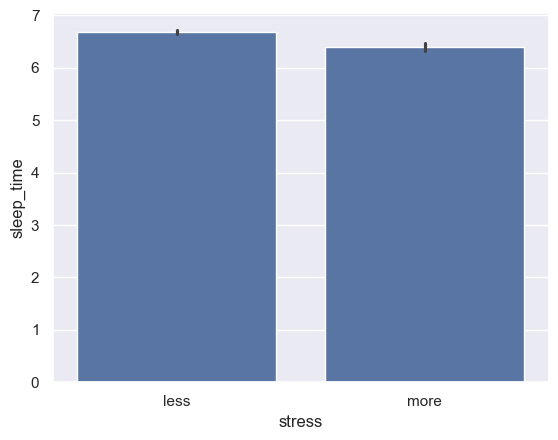

In [182]:
# 막대그래프(barplot) 예시
sns.barplot(x = "stress", y  = "sleep_time", data = df_selected)
# ?sns.barplot
plt.show()

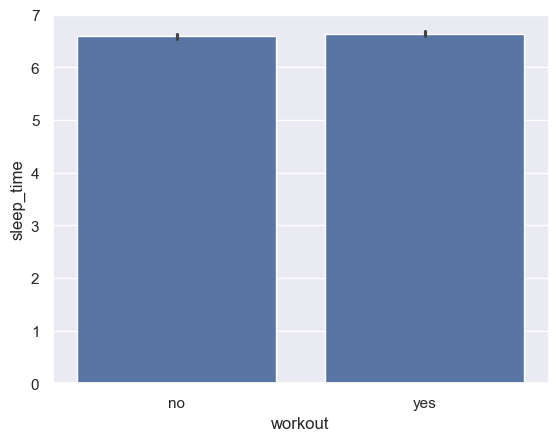

In [183]:
# 막대그래프(barplot) 예시
sns.barplot(x = "workout", y  = "sleep_time", data = df_selected)
# ?sns.barplot
plt.show()

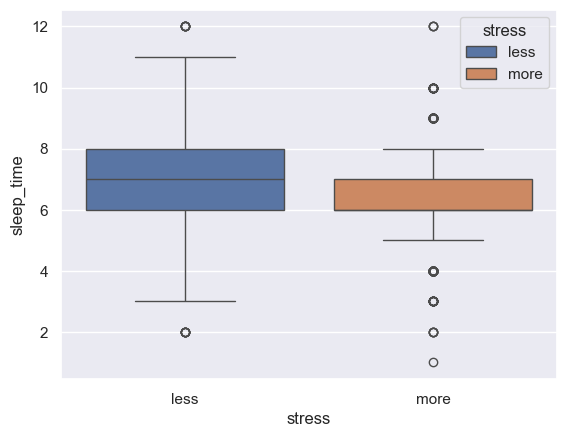

In [190]:
sns.boxplot(x = 'stress', y='sleep_time', data = df_selected, hue = 'stress')
plt.show()